# Lista de revisão para a prova com árvores de clusterização

## 1 - Avalie o desempenho dos algoritmos DecisionTree, RandomForest e Gradient Boosting para o dataset "Wisconsin Diagnostic Breast Cancer (WDBC)". 
- Separe os dados em treino (60%), validação (20%) e teste (20%).
- Use um valor constante para o parâmetro random_state e teste os resultados com as seguintes combinações de hiper-parâmetros para RandomForest e Gradient Boosting usando Grid-Search:
    - ##### learning_rate: 0.1, 0.05, 0.01 (somente para o Gradient Boosting)
    - ##### n_estimators: 50, 100, 200
    - ##### max_depth: 3, 5, 7 
    
- Mostre a importância das features de acordo com o melhor modelo de classificação e o melhor modelo de regressão encontrados dentre os 3 usados nesta lista de exercícios (DecisionTree, RandomForest e Gradient Boosting).

### Importing Libraries

In [50]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

#Algorithms
from sklearn.ensemble import RandomForestRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier #For Classification
from sklearn.tree import DecisionTreeRegressor #For Regression
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression
from sklearn.ensemble import RandomForestClassifier #For Classification

RANDOM_STATE = 42

### Loading dataset

In [3]:
cols = ['ID', 'label', 'mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness',
        'mean concavity','mean concave points','mean symmetry','mean fractal dimension','radius error','texture error',
        'perimeter error','area error','smoothness error','compactness error','concavity error','concave points error',
        'symmetry error','fractal dimension error','worst radius','worst texture','worst perimeter','worst area',
        'worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry',
        'worst fractal dimension']
df = pd.read_csv('wdbc.data', names=cols)

In [4]:
df.head()

,ID,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                         569 non-null int64
label                      569 non-null object
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non

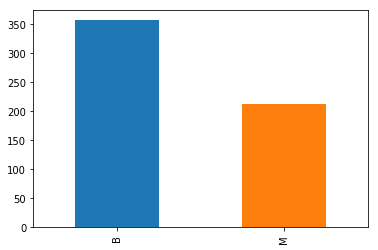

In [10]:
df['label'].value_counts().plot(kind="bar")

### Droping ID 'cause don't make difference

In [12]:
df = df.drop('ID', axis=1)

In [14]:
le = LabelEncoder()
df['label'] = le.fit_transform(df.values[:, 0])

In [15]:
df.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Splitting data to train, test

In [16]:
X = df.values[:, 1:]
y = df.values[:, 0]

In [24]:
rs = np.random.RandomState(RANDOM_STATE)
shuffled_indices = rs.permutation(X.shape[0])
shuffled_indices[:20]

array([204,  70, 131, 431, 540, 567, 369,  29,  81, 477, 457, 167, 165,
       329, 527,  83, 511, 556, 101, 535])

In [25]:
X = X[shuffled_indices]
y = y[shuffled_indices]

### Setting dataset for training, validation and test

In [37]:
p20 = int(round(len(y) * 0.20))
p60 = int(round(len(y) * 0.60))

X_train = X[:p60]
y_train = y[:p60]

X_val = X[p60:(p60+p20)]
y_val = y[p60:(p60+p20)]

X_test = X[(p60+p20):]
y_test = y[(p60+p20):]


In [39]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(341, 30) (341,)
(114, 30) (114,)
(114, 30) (114,)


### Creating train and avaliation of models using GridSearch.¶

### Used Algorithms

- DecisionTree
- RandomForest
- Gradient Boosting

In [44]:
# Using cv with 3 folds
cv = StratifiedKFold(n_splits=3, random_state=RANDOM_STATE)

### Seting pipelines dictionary

In [47]:
pipe = {}
pipe['DecTreeClass'] = {'pipeline': make_pipeline(DecisionTreeClassifier())}
pipe['DecTreeReg'] = {'pipeline': make_pipeline(DecisionTreeRegressor())}
pipe['RForestClass'] = {'pipeline': make_pipeline(RandomForestClassifier())}
pipe['RForestReg'] = {'pipeline': make_pipeline(RandomForestRegressor())}
pipe['GBoostClass'] = {'pipeline': make_pipeline(GradientBoostingClassifier())}
pipe['GBoostReg'] = {'pipeline': make_pipeline(GradientBoostingRegressor())}

### Setting params

In [48]:
learning_rate = [0.1, 0.05, 0.01]
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]

### Setting ParamGrid

In [65]:
param_grid = {}

param_grid['DecTreeClass'] = {'param_grid':    [{'decisiontreeclassifier__max_depth': max_depth,
                                                 'decisiontreeclassifier__criterion': ['gini']},
                                                {'decisiontreeclassifier__max_depth': max_depth, 
                                                 'decisiontreeclassifier__criterion': ['entropy']}]}

param_grid['DecTreeReg'] = {'param_grid':    [{'decisiontreeregressor__max_depth': max_depth,
                                                 'decisiontreeregressor__criterion': ['mse']},
                                                {'decisiontreeregressor__max_depth': max_depth, 
                                                 'decisiontreeregressor__criterion': ['friedman_mse']},
                                                {'decisiontreeregressor__max_depth': max_depth, 
                                                 'decisiontreeregressor__criterion': ['mae']}]}

param_grid['RForestClass'] = {'param_grid': [{'randomforestclassifier__max_depth': max_depth,
                                              'randomforestclassifier__n_estimators': n_estimators,
                                              'randomforestclassifier__criterion': ['gini']},
                                             {'randomforestclassifier__max_depth': max_depth,
                                              'randomforestclassifier__n_estimators': n_estimators,
                                              'randomforestclassifier__criterion': ['entropy']}]}

param_grid['RForestReg'] = {'param_grid': [{  'randomforestregressor__max_depth': max_depth,
                                              'randomforestregressor__n_estimators': n_estimators,
                                              'randomforestregressor__criterion': ['mse']},
                                             {'randomforestregressor__max_depth': max_depth,
                                              'randomforestregressor__n_estimators': n_estimators,
                                              'randomforestregressor__criterion': ['mae']}]}

param_grid['GBoostClass'] = {'param_grid': [{ 'gradientboostingclassifier__max_depth': max_depth,
                                              'gradientboostingclassifier__n_estimators': n_estimators,
                                              'gradientboostingclassifier__learning_rate': learning_rate}]}


param_grid['GBoostReg'] = {'param_grid': [{   'gradientboostingregressor__max_depth': max_depth,
                                              'gradientboostingregressor__n_estimators': n_estimators,
                                              'gradientboostingregressor__learning_rate': learning_rate}]}

### Setting GridSearchCV to estimate the best model for each algorithm¶

In [66]:
models = ['DecTreeClass', 'DecTreeReg', 'RForestClass', 'RForestReg', 'GBoostClass', 'GBoostReg']

In [68]:
gs = {}

for model in models:
    gs[model] = {'gridsearch': GridSearchCV(estimator=pipe[model]['pipeline'],
                                            param_grid=param_grid[model]['param_grid'],
                                            scoring='average_precision',
                                            cv=cv,
                                            n_jobs=-1,
                                            return_train_score=True)}

### Finding the best parameters for each algorithm

In [78]:
for model in models:
    gs[model]['gridsearch'].fit(X_train, y_train)
    print("Best score " + model + ": ") 
    print(gs[model]['gridsearch'].best_score_) 
    print("Best params " + model + ": ") 
    print(gs[model]['gridsearch'].best_params_)

Best score DecTreeClass: 
0.8962299037650524
Best params DecTreeClass: 
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 3}

Best score DecTreeReg: 
0.864987020275984
Best params DecTreeReg: 
{'decisiontreeregressor__criterion': 'friedman_mse', 'decisiontreeregressor__max_depth': 3}



C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score RForestClass: 
0.9834807533173378
Best params RForestClass: 
{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__n_estimators': 50}

Best score RForestReg: 
0.9753832287995844
Best params RForestReg: 
{'randomforestregressor__criterion': 'mae', 'randomforestregressor__max_depth': 7, 'randomforestregressor__n_estimators': 200}

Best score GBoostClass: 
0.9688089769448798
Best params GBoostClass: 
{'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 200}

Best score GBoostReg: 
0.967124542445637
Best params GBoostReg: 
{'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__n_estimators': 200}



### Showing feature importances for each model

In [94]:
best_models = {}
y_pred = {}

for model in models:
    best_models[model] = gs[model]['gridsearch'].best_estimator_
    best_models[model].fit(X_train, y_train)
    y_pred[model] = best_models[model].predict(X_test)
    print("Test accuracy to " + model + ": ") 
    print(best_models[model].score(X_test, y_test))
    print()

Test accuracy to DecTreeClass: 
0.9035087719298246

Test accuracy to DecTreeReg: 
0.7123125833415216

Test accuracy to RForestClass: 
0.9298245614035088

Test accuracy to RForestReg: 
0.7605221657669101

Test accuracy to GBoostClass: 
0.9473684210526315

Test accuracy to GBoostReg: 
0.816682101055545



In [156]:
decTree = gs['DecTreeClass']['gridsearch'].best_estimator_
modelo = print(decTree['decisiontreeclassifier'])

TypeError: 'Pipeline' object is not subscriptable

In [157]:
dec = DecisionTreeClassifier()
dec

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 2 - Faça a clusterização do dataset deste link usando o algoritmo K-Means++.". 
- O dataset possui os seguintes dados de motoristas: 
    - a distância média dirigida por dia
    - a média percentual do tempo que um motorista estava 5mph (acima do limite de velocidade).
    
- Portanto, agrupe os motoristas pela similaridade das features acima.
- Use o método do cotovelo (Elbow Method) para identificar o melhor valor de k para o K-Means++.
- Mostre o resultado graficamente.

## 3 - Use Clusterização Hierárquica no mesmo dataset da questão 2 usando "complete" como critério de ligação (linkage). Mostre o dendograma.
- Use o parâmetro n_clusters da função scipy.cluster.hierarchy.cut_tree  para obter o número de clusters igual ao melhor resultado obtido com o K-Means (Questão 2). Exemplo: 
    - distance_matrix = scipy.spatial.distance.pdist(X, metric='euclidean')
    - cluster_model = scipy.cluster.hierarchy.complete(distance_matrix)
    - dendogram = scipy.cluster.hierarchy.dendrogram(cluster_model)
    - sensor_cluster_list = scipy.cluster.hierarchy.cut_tree(cluster_model, n_clusters=8)
    - Mostre o resultado graficamente.

## 4 - Use o DBScan  para clusterizar o mesmo dataset da questão 2 e mostre o resultado graficamente.

